# Распространение и эпидемии в сетях

In [2]:
import networkx as nx
from tqdm.notebook import trange
import numpy as np
import scipy
from matplotlib.animation import FuncAnimation
from scipy.optimize import minimize
from IPython.display import HTML
from zlib import adler32
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Задание 1. Метод Эйлера (0 баллов)

Метод Эйлера представляет собой простую численную процедуру решения обыкновенных дифференциальных уравнений (ОДУ) с заданными начальными значениями. Например, если мы хотим решить уравнение

$$dx/dt = \sin(x)$$

с начальным значением $x = x_0$, мы можем заменить $dx = \Delta x = x_{i+1} - x_{i}$ и $dt = \Delta t$, поэтому мы получаем

$$\frac{x_{i+1} - x_i}{\Delta t} = \sin(x)$$

$$x_{i+1} = x_i + \sin(x)\Delta t$$

Пусть $\Delta t = 0.1$, и тогда мы можем решить уравнение, используя эту итеративную форму следующим образом

In [3]:
def solve_sinx(x0, dt, k):
    x = x0
    solution = [x0]
    for _ in range(k):
        dx = np.sin(x) * dt
        x = x + dx
        solution.append(x)
    return solution

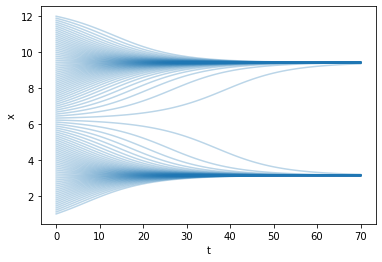

In [4]:
dt = 0.1
for x0 in np.linspace(1, 12, 100):
    solution = solve_sinx(x0, dt, 70)
    plt.plot(solution, c='tab:blue', alpha=0.3);
plt.xlabel('t')
plt.ylabel('x')
plt.show()

Предположим, что мы хотим решить знаменитую хаотическую систему Лоренца.:

$$
    \begin{cases}
    \frac{dx}{dt} = \sigma(y-x)\\\\\
    \frac{dy}{dt} = x(\rho - z) - y\\\\\ 
    \frac{dz}{dt} = xy - \beta z
    \end{cases}
$$

с параметрами $\rho = 28$, $\sigma = 10$, $\beta = 8/3$ и начальными значениями $x = y = z = 10$

Напишите функцию `lorenz`, которая принимает начальные значения, параметры, приращение времени `dt`, количество итераций `k` и возвращает np.array с решением формы `[[x0, y0, z0], [x1, y1, z1], ...]`, так что количество строк равно `k+1`.

In [5]:
def lorenz(x0, y0, z0, rho, sigma, beta, dt, k):
    # YOUR CODE HERE
    x = x0
    y = y0
    z = z0
    
    lorenzz = ([[x0, y0, z0]])
    
    for _ in range(k):
        dx = (sigma * (y - x))*dt
        dy = (x * (rho-z) - y)*dt
        dz = (x * y)*dt - (beta*z)*dt
        
        x += dx
        y += dy
        z += dz
        
        lorenzz.append([x, y, z])
    
    lorenzz = np.array(lorenzz)
    print(lorenzz)
    
    return lorenzz

In [6]:
sim = lorenz(10., 10., 10., 28., 10., 8/3, 0.01, 8000-1)
assert sim.shape == (8000, 3)
assert np.all(sim[0] == [10, 10, 10])
assert np.all(sim[1].round(2) == [10., 11.7, 10.73])
assert np.all(sim[2].round(2) == [10.17, 13.31, 11.62])
assert adler32(str(sim[3].round(2)[0]).encode()) == 48496892

[[ 10.          10.          10.        ]
 [ 10.          11.7         10.73333333]
 [ 10.17        13.30966667  11.61711111]
 ...
 [-12.09941476 -14.10513897  29.39712108]
 [-12.29998718 -13.79504411  30.31983712]
 [-12.44949288 -13.371754    31.20809678]]


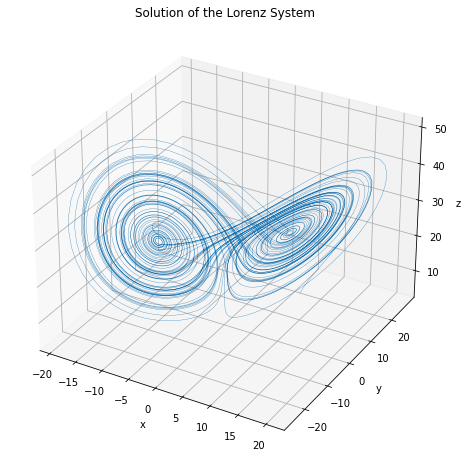

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
xs, ys, zs = sim[:, 0], sim[:, 1], sim[:, 2]
ax.plot(xs, ys, zs, lw=0.3)
plt.title('Solution of the Lorenz System')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Задание 2. Модель SI (0 баллов)

Рассмотрим простую модель эпидемии — модель SI. S — восприимчивый, I — заразный. Изначально у нас всего несколько инфицированных, а все остальные восприимчивы. Затем некоторые восприимчивые люди заражаются инфекцией $\beta$. Модель определяется следующим образом:

Динамическая форма

$$S \underset{\beta SI}{\to} I$$

Форма уравнения

$$\frac{dI}{dt} = \beta \frac{S}{N}I$$

$$S + I = N$$

где $N$ — общая численность населения.

Напишите функцию `si_epidemic`, которая принимает общую численность населения `total`, количество зараженных людей `I0`, коэффициент заражения `beta`, приращение времени `dt`, количество итераций `k` и возвращает результат np.array с решением. вида `[[S0, I0], [S1, I1], ...]`, так что количество строк равно k+1.

In [8]:
def si_epidemic(total, I0, beta, dt, k):
    # YOUR CODE HERE
    
    S0 = total - I0
    
    si = ([[S0, I0]])

    for _ in range(k):
        dI = ((beta*S0*I0)/total)*dt
        
        S0 -= dI
        I0 += dI
        
        si.append([S0, I0])
    
    si = np.array(si)

    return si

In [9]:
solution = si_epidemic(total=1000, I0=1, beta=0.3, dt=0.5, k=130-1)
assert solution.shape == (130, 2)
assert np.all(solution[0] == [999, 1])
assert np.all(solution[10].round(2) == [995.97, 4.03])
assert np.all(solution[-1].round(2) == [0, 1000])
assert adler32(str(solution[100].round(2)[0]).encode()) == 32047304

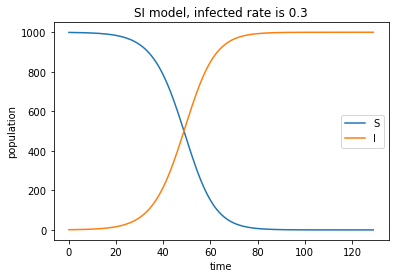

In [10]:
plt.plot(solution)
plt.legend(['S', 'I'])
plt.title('SI model, infected rate is 0.3')
plt.xlabel('time')
plt.ylabel('population')
plt.show()

Посмотрим на график динамики эпидемии с той же установкой, но с $\beta = 0,1$

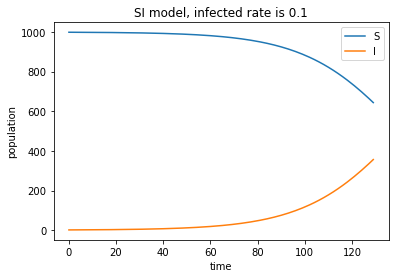

In [11]:
solution = si_epidemic(total=1000, I0=1, beta=0.1, dt=0.5, k=130-1)
plt.plot(solution)
plt.legend(['S', 'I'])
plt.title('SI model, infected rate is 0.1')
plt.xlabel('time')
plt.ylabel('population')
plt.show()

## Задание 3. Модель SIR (2 балла)

Следующая модель SIR. S — восприимчивые, I — заразные, R — переболевшие. Изначально у нас всего несколько инфицированных, а остальные восприимчивы. Затем некоторые восприимчивые люди заражаются с уровнем заражения $\beta$, а некоторые инфицированные выздоравливают с уровнем выздоровления $\gamma$. Шансов заразиться после выздоровления нет. Модель определяется следующим образом:

Динамическая форма

$$S \underset{\beta SI}{\to} I \underset{\gamma I}{\to} R$$

Форма уравнения (в долях населения)

$$\begin{cases}
ds/dt = -\beta si\\\
di/dt = \beta si - \gamma i\\\
dr/dt = \gamma i\\\
s+i+r = 1
\end{cases}$$


Напишите функцию `sir_epidemic`, которая принимает начальную пропорцию `s0`, `i0`, `r0`, скорость заражения `beta`, скорость выздоровления `gamma`, количество шагов `k` и приращение времени `dt`. Функция возвращает np.array формы «(k+1, 3)» с пропорциями «s», «i», «r» на каждом шаге. Первая строка содержит начальную пропорцию.

In [12]:
def sir_epidemic(s0, i0, r0, beta, gamma, k, dt):
    # YOUR CODE HERE
    
    s = s0
    i = i0
    r = r0
    
    sir = ([[s0, i0, r0]])
    
    for _ in range(k):
        ds = (-beta * s * i) * dt
        di = (beta * s * i - gamma * i) * dt
        dr = (gamma * i) * dt
        
        s += ds
        i += di
        r += dr
        
        sir.append([s, i, r])
        
    sir = np.array(sir)    
    return sir

In [13]:
s0, i0, r0 = 0.99, 0.01, 0
beta, gamma = 0.6, 0.1
dt = 1
epidemic = sir_epidemic(s0, i0, r0, beta, gamma, 80, dt)
assert epidemic.shape == (81, 3)
assert np.all(epidemic[0] == [0.99, 0.01, 0.  ])
assert np.all(epidemic[5].round(2) == [0.92, 0.07, 0.01])
assert np.all(epidemic[80].round(2) == [0, 0, 1])
assert adler32(str(epidemic[10].round(2)[1]).encode()) == 32112840

Здесь также находится критическая точка для основного числа воспроизводства $R_0 = \beta / \gamma$

* Если $R_0 > 1$: эндемичное состояние, $r(+\infty) \to 1$
* Если $R_0 < 1$: Безболезненное состояние, $r(+\infty) \to \text{const}$

где $r(t)$ — доля выздоровевших на момент времени $t$.

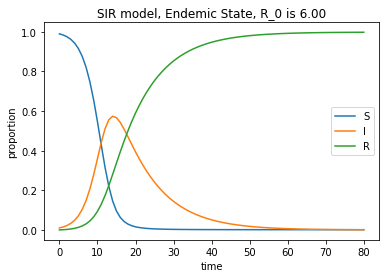

In [14]:
plt.plot(epidemic)
plt.legend(['S', 'I', 'R']);
plt.title('SIR model, Endemic State, R_0 is {:.2f}'.format(beta/gamma))
plt.xlabel('time')
plt.ylabel('proportion')
plt.show()

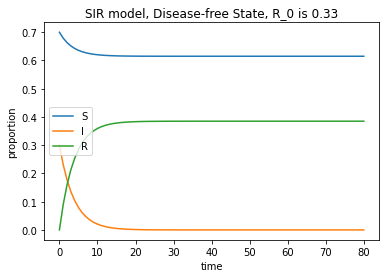

In [15]:
s0, i0, r0 = 0.7, 0.3, 0.
dt = 1
beta, gamma = 0.1, 0.3
epidemic = sir_epidemic(s0, i0, r0, beta, gamma, 80, dt)
plt.plot(epidemic)
plt.legend(['S', 'I', 'R']);
plt.title('SIR model, Disease-free State, R_0 is {:.2f}'.format(beta/gamma))
plt.xlabel('time')
plt.ylabel('proportion')
plt.show()

## Задание 4. Распространение по сетям (2 балла)

Диффузионный процесс — это модель распространения, в которой узловые значения $\phi$ (say, «heat») распространяются за пределы зоны высокой концентрации. Рассмотрим диффузию на сетке размером 20x20. Пусть имеется подсетка 3x3 с теплотворной способностью 3 и подсетка 7x5 с теплотворной способностью 1. Все остальные узлы имеют значение 0. Начальное тепловое значение равно $\phi_0$.

In [16]:
phi_map = np.zeros((20, 20))
phi_map[1:4, 1:4] = 3
phi_map[10:15, 8:15] = 1
phi0 = phi_map.flatten()

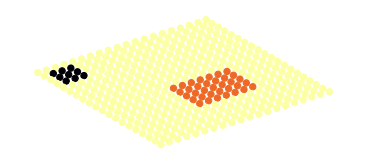

In [17]:
plt.figure(figsize=(7*0.7, 3*0.7))
gridG = nx.grid_graph((20, 20))
nx.draw_kamada_kawai(
    gridG,
    cmap=plt.cm.inferno_r,
    vmin=0, vmax=3,
    width=0,
    node_size=40,
    node_color=phi0)

Создайте симуляцию диффузии на основе этого уравнения диффузии
$$\frac{d\phi}{dt} = -CL\phi$$
    
где $L$ — графовый лапласиан.

Напишите функцию `next_phi`, которая принимает матрицу смежности `A`, np.array с предыдущими значениями тепла `phi`, константой `C` и приращением времени `dt`. Функция возвращает np.array со следующими значениями тепла.

In [18]:
def next_phi(A, phi, C, dt):
    # YOUR CODE HERE
    L = nx.laplacian_matrix(nx.from_numpy_matrix(A))
    
    dphi = - C * L * phi * dt 
    dphi += phi
    
    return dphi

In [19]:
A = nx.to_numpy_array(gridG)
C = 0.1
dt = 2
phi = next_phi(A, phi0, C, dt)
assert phi.shape == (400,)
assert phi.sum() == phi0.sum()
assert phi.std() < phi0.sum()
assert round(phi[20:25].sum(), 4) == 7.2

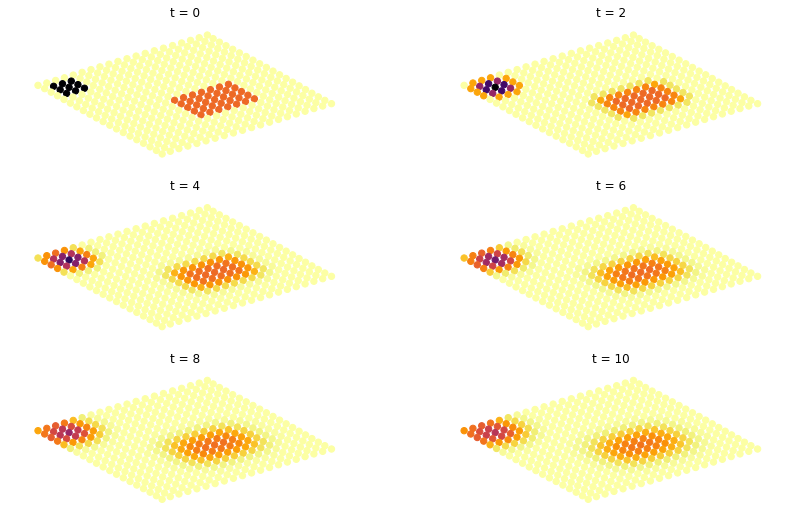

In [20]:
plt.figure(figsize=(7*2, 3*3))

phi = phi0
for i in range(6):
    plt.subplot(3, 2, i+1)
    gridG = nx.grid_graph((20, 20))
    nx.draw_kamada_kawai(
        gridG,
        cmap=plt.cm.inferno_r,
        vmin=0, vmax=3,
        width=0,
        node_size=40,
        node_color=phi)
    plt.title('t = {}'.format(i*dt))
    phi = next_phi(A, phi, C, dt)
phi12 = phi

Мы можем запускать моделирование шаг за шагом столько, сколько нам нужно, но, к счастью, есть аналитическое решение

$$\phi(t) = \sum_k a_k(t) v_k = \sum_k a_k(0) e^{-C\lambda_k t} v_k$$

где $a_k(t) = \phi(t)^T v_k$ и $v_k$ - k-й наименьший собственный вектор лапласиана.

Напишите функцию `phi_t`, которая принимает матрицу смежности `A`, np.array с начальными значениями тепла `phi0`, константой `C` и моментом времени `t`. Функция возвращает np.array со значениями тепла в момент времени `t`. Используйте `np.linalg.eigh` или `scipy.linalg.eigh` для симметричной матрицы.

In [21]:
def phi_t(A, phi0, C, t):
    # YOUR CODE HERE
    
    D = np.diag(A.sum(axis=1)) 
    L = D - A
    
    w, v = np.linalg.eigh(L) 
    
    res = np.zeros(len(phi0)) 
    
    for k in range(len(w)):
        ak0 = phi0.T @ v[:,k]
        res += ak0 * np.exp(-C * w[k] * t) * v[:,k]
    
    return res

In [22]:
assert phi_t(A, phi0, C, 0).shape == (400,)
assert round(np.linalg.norm(phi0 - phi_t(A, phi0, C, 0)), 4) == 0
assert round(np.linalg.norm(phi12 - phi_t(A, phi0, C, 12)), 4) < 0.4
assert len(np.unique(phi_t(A, phi0, C, 10000).round(4))) == 1
assert phi_t(A, phi0, C, 10000).round(4)[0] == phi0.sum() / len(phi0)

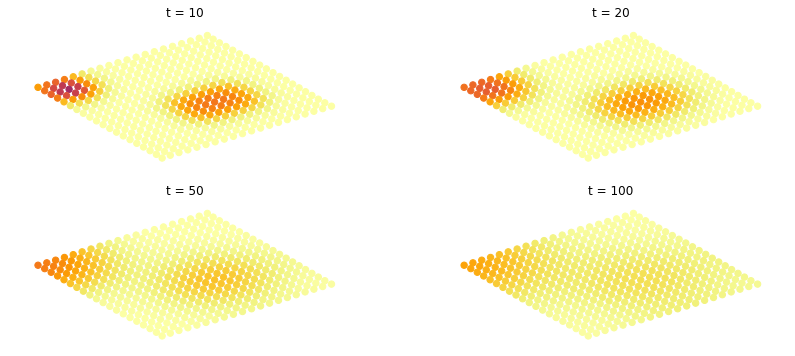

In [23]:
plt.figure(figsize=(7*2, 3*2))
i = 1
for t in [10, 20, 50, 100]:
    plt.subplot(2, 2, i)
    gridG = nx.grid_graph((20, 20))
    nx.draw_kamada_kawai(
        gridG,
        cmap=plt.cm.inferno_r,
        vmin=0, vmax=3,
        width=0,
        node_size=40,
        node_color=phi_t(A, phi0, C, t))
    plt.title('t = {}'.format(t))
    i += 1

## Задание 5. Модель SIS на сетях (0 баллов)

Рассмотрим модели эпидемий в сетях. Модель SIS описывается динамической формой

$$S \to_{\beta SI} I \to_{\gamma I} S$$

Для моделирования эпидемий в сетях нам необходимо использовать вероятностный подход. Во-первых, давайте определим функцию, которая дает нам случайную выборку доступных узлов с заданной вероятностью.

Вот функция `select_nodes`, которая принимает массив np.array `vec`, где i-й элемент — это количество соседей, которые могут воздействовать на i-й узел с вероятностью `proba`. Например, `vec` может представлять количество зараженных соседей, скажем, [0, 2, 1], а затем вероятностью является процент зараженных $\beta$. Это означает, что у первого узла нет зараженных соседей, у второго — два зараженных соседа, у третьего — один зараженный сосед. Таким образом, второй узел имеет вероятность заражения $(1 - (1-\beta)^2)$.

In [24]:
def select_nodes(vec, proba):
    sample = np.random.rand(len(vec))
    res = sample < (1 - (1 - proba)**vec)
    return res.astype('int')

Давайте заразим несколько случайных узлов и смоделируем распространение эпидемии.

Напишите функцию `sis_networks`, которая берет граф `G`, np.array с начальным индикаторным вектором `S`, где `S[i]` равно 1, если i-й узел восприимчив, и 0 в противном случае (то же самое для `I `). Любой узел должен быть уязвимым или зараженным на любом этапе. Также функция принимает коэффициенты `beta`, `gamma`, количество шагов `k`. Функция возвращает np.array формы `(k+1, 2, n)`, где `n` — количество узлов. На i-м шаге матрица `result[i, :, :]` содержит показатель `S` в первом столбце и `I` во втором.

`Hint`: to calculate the number of infected neighbors, use `I @ A * S`

In [25]:
def sis_networks(G, S, I, beta, gamma, k):
    # YOUR CODE HERE
    
    answer = [[S, I]]
    A = nx.to_numpy_array(G)
    
    for i in range(k):
        S_prev, I_prev = answer[-1]
        I_next = I_prev + select_nodes(I_prev @ A * S_prev, beta) - select_nodes(I_prev, gamma)
        S_next = 1-I_next
        answer.append([S_next, I_next])
    
    return np.array(answer)

In [26]:
G = nx.barabasi_albert_graph(50, 3, seed=0)

I = np.zeros(len(G))
I[:3] = 1
S = 1 - I
beta = 0.2
gamma = 0.2

epidemic = sis_networks(G, S, I, beta, gamma, 100)
assert epidemic.sum() == 5050
assert epidemic.shape == (101, 2, 50)
assert (epidemic.sum(axis=1) == 1).sum() == 5050
sigma = 6.3853
mean = 16.0198
assert mean - 2*sigma < round(epidemic.sum(axis=2)[:, 0].mean(), 4) < mean + 2*sigma
sigma = 5.953
mean = 34.2178
assert mean - 2*sigma < round(epidemic.sum(axis=2)[:, 1].mean(), 4) < mean + 2*sigma

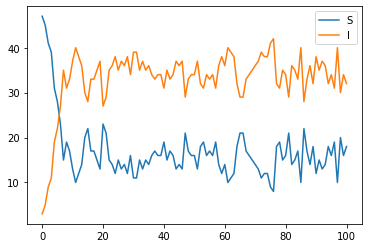

In [27]:
plt.plot(epidemic.sum(axis=2))
plt.legend(['S', 'I']);

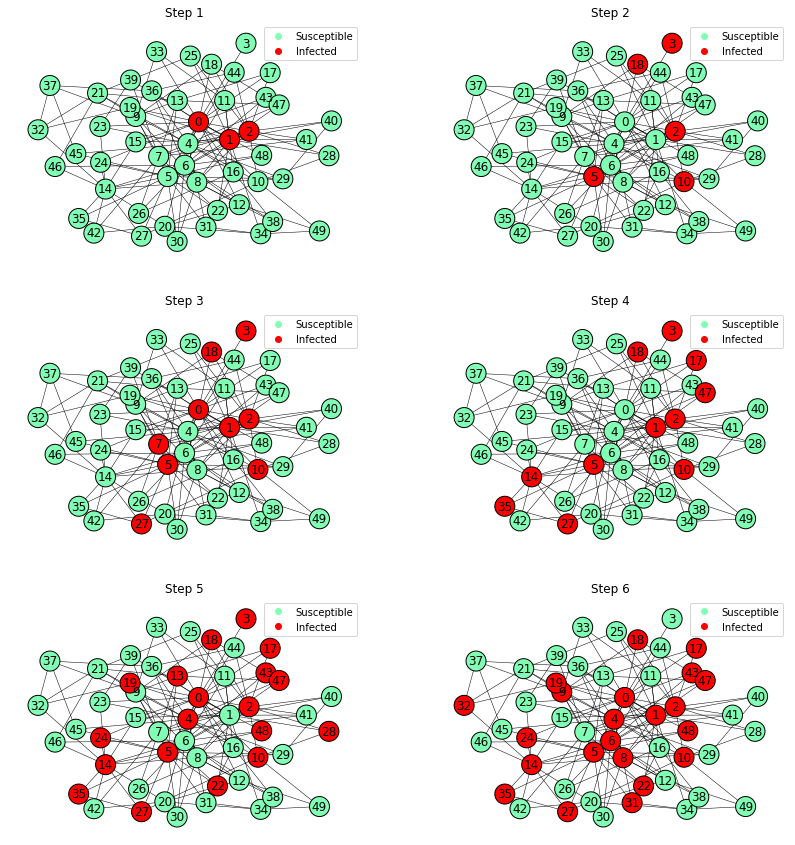

In [28]:
plt.figure(figsize=(7*2, 5*3))
pos = nx.kamada_kawai_layout(G)
i = 1
for S, I in epidemic[:6]:
    plt.subplot(3, 2, i)
    nodes = nx.draw_networkx_nodes(G, pos, 
            node_size=400,
            node_color=I+1, 
            vmin=0, vmax=2, 
            cmap=plt.cm.rainbow,
            edgecolors='black')
    nx.draw_networkx_edges(G, pos,
            width=0.5,
            node_size=400)
    nx.draw_networkx_labels(G, pos)
    plt.title('Step {}'.format(i))
    plt.legend(nodes.legend_elements()[0], ['Susceptible', 'Infected'])
    plt.axis('off')
    i += 1

## Задание 6. Модель SIRS на сетях (2 балла)

Давайте реализуем модель уровня узла SIRS.

$$S \to_{\beta SI} I \to_{\gamma I} R \to_{\delta R} S$$

Напишите функцию `sirs_networks`, которая принимает граф `G`, np.array с начальным индикатором `S`, где `S[i]` равно 1, если i-й узел восприимчив, и 0 в противном случае (то же самое для `I` и «R»). Также функция принимает коэффициенты `beta`, `gamma`, `delta`, количество шагов `k`. Функция возвращает np.array формы `(k+1, 3, n)`, где `n` — количество узлов. На i-м шаге матрица `result[i, :, :]` содержит показатель `S` в первом столбце, `I` во втором, `R` в третьем.

In [29]:
def sirs_networks(G, S, I, R, beta, gamma, delta, k):
    # YOUR CODE HERE
    np.random.seed(0)
    answer = [[S, I, R]]
    A = nx.to_numpy_array(G)
    for i in range(k):
        S_prev, I_prev, R_prev = answer[-1]
        dR = select_nodes(I_prev, gamma)
        S2I = select_nodes(I_prev @ A * S_prev, beta)
        I_next = I_prev + S2I - dR
        R_next = R_prev + dR - select_nodes(R_prev, delta)
        S_next = 1-R_next-I_next
        answer.append([S_next, I_next, R_next])
    return np.array(answer)

In [30]:
G = nx.barabasi_albert_graph(40, 3, seed=0)
I = np.zeros(len(G))
I[:3] = 1
S = 1 - I
R = np.zeros(len(G))

beta = 0.1
gamma = 0.3
delta = 0.1

epidemic = sirs_networks(G, S, I, R, beta, gamma, delta, 200)
assert epidemic.shape == (201, 3, 40)
assert (epidemic.sum(axis=1) == 1).sum() == 8040
assert (epidemic[200].sum(axis=1) == [40, 0, 0]).sum() == 3

for k in range(6):
    for node in G.nodes:
        if epidemic[k, 0, node] > epidemic[k+1, 0, node]:
            assert epidemic[k+1, 1, node] == 1
            neighbors = np.array([n for n in G.neighbors(node)])
            assert epidemic[k, 1][neighbors].sum()
        elif epidemic[k, 1, node] > epidemic[k+1, 1, node]:
            assert epidemic[k+1, 2, node] == 1
        elif epidemic[k, 2, node] > epidemic[k+1, 2, node]:
            assert epidemic[k+1, 0, node] == 1

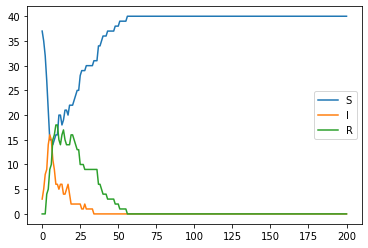

In [31]:
plt.plot(epidemic.sum(axis=2))
plt.legend(['S', 'I', 'R']);

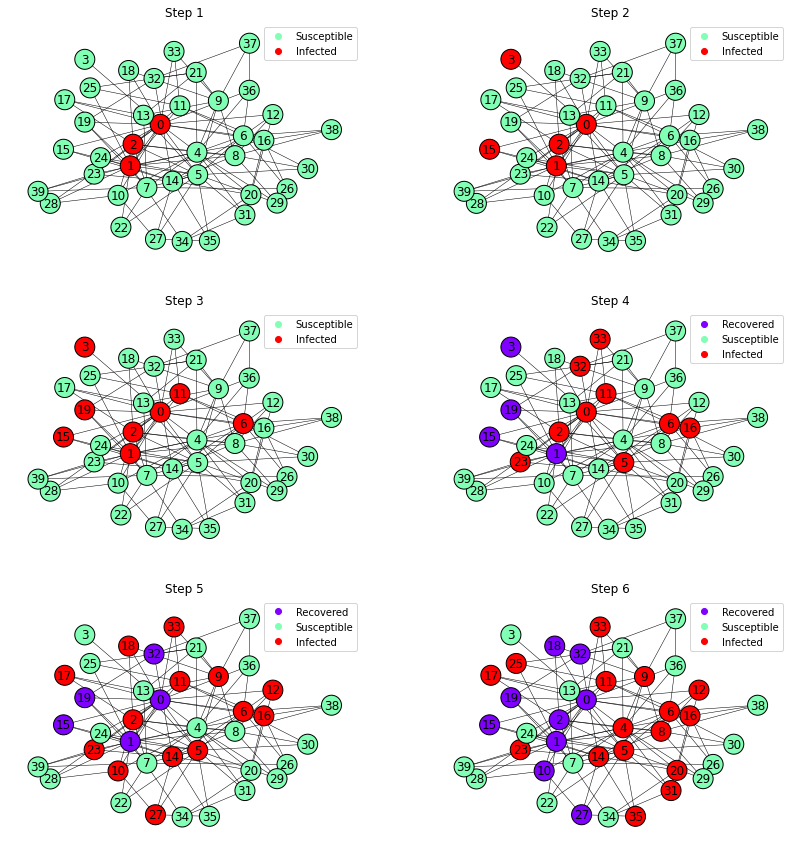

In [32]:
plt.figure(figsize=(7*2, 5*3))
pos = nx.kamada_kawai_layout(G)
i = 1
for S, I, R in epidemic[:6]:
    plt.subplot(3, 2, i)
    nodes = nx.draw_networkx_nodes(G, pos, 
            node_size=400,
            node_color=(S + I*2), 
            vmin=0, vmax=2, 
            cmap=plt.cm.rainbow,
            edgecolors='black')
    nx.draw_networkx_edges(G, pos,
            width=0.5,
            node_size=400)
    nx.draw_networkx_labels(G, pos)
    plt.title('Step {}'.format(i))
    if len(nodes.legend_elements()[0]) == 2:
        plt.legend(
            nodes.legend_elements()[0], 
            ['Susceptible', 'Infected'])
    else:
        plt.legend(
            nodes.legend_elements()[0], 
            ['Recovered', 'Susceptible', 'Infected'])
    plt.axis('off')
    i += 1

Мы также можем смоделировать «вторые волны», используя параметр дельта.

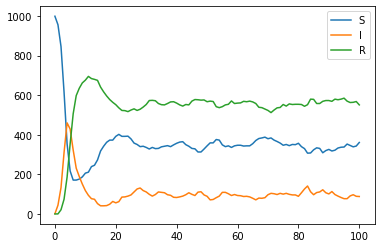

In [33]:
G = nx.barabasi_albert_graph(1000, 3, seed=0)

I = np.zeros(len(G))
I[0] = 1
S = 1 - I
R = np.zeros(len(G))

epidemic = sirs_networks(G, S, I, R, 0.3, 0.4, 0.07, 100)
plt.plot(epidemic.sum(axis=2))
plt.legend(['S', 'I', 'R']);

## График Эрдоша-Реньи

Эта часть задания посвящена моделям распространения влияния: линейной пороговой модели и независимой каскадной модели. Есть много применений этих типов моделей, например:

* Возникновение политического движения в нестабильном обществе
* Эффекты «сарафанного радио»: когда у нас есть доступ к большому количеству информации, например, когда мы оцениваем новые технологии, рискованные финансовые активы или кандидатов на работу, нам часто не хватает возможности разобраться в ней; следовательно, мы полагаемся на советы надежных друзей, коллег или советников.
* Влияние «вирусного маркетинга» на успех новых продуктов
* Внедрение медицинских и сельскохозяйственных инноваций
* Каскадные сбои в энергосистемах
* Принятие решения большинством голосов

Рассмотрим эти модели на ориентированном графе Эрдоша Реньи.

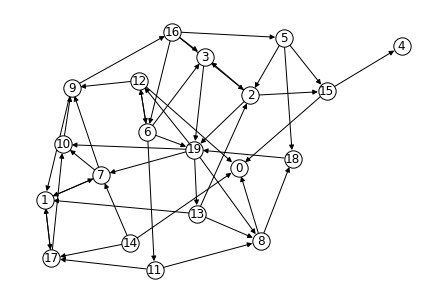

In [34]:
n = 20
G = nx.erdos_renyi_graph(n, 0.11, 0, True)

plt.figure(figsize=(6, 4))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_color='white', edgecolors='black')

## Задание 7. Линейная пороговая модель (0 баллов)

Линейная пороговая модель определяется следующим образом. При выбранных порогах всех узлов и начальном наборе активных узлов процесс диффузии разворачивается детерминировано дискретными шагами: на шаге $t$ все узлы, которые были активны на шаге $t-1$, остаются активными; кроме того, каждый в настоящее время неактивный узел становится активным тогда и только тогда, когда общая доля его активных соседей не ниже порогового значения узла.

Напишите функцию `linear_threshold`, которая принимает граф, np.array `active_nodes` с нулями и единицами (если `active_nodes[i]` равно 1, то i-й узел активен), np.array `thresholds`. Функция распространяет влияние и останавливается, когда модель перестает изменяться. Функция возвращает np.array с активными узлами на каждом шаге. Первый шаг — начальная активация, последний и предпоследний шаги одинаковы (мы хотим видеть, что распространение перестает меняться).

In [35]:
def linear_threshold(G, active_nodes, thresholds):
    # YOUR CODE HERE
    
    result = [active_nodes]
    current_active_nodes = active_nodes.copy()
    
    while True:
        active_nodes = current_active_nodes.copy()
        for n in G.nodes:
            if current_active_nodes[n] != 1:
                neighbors = [i for i in G.predecessors(n)]
                np.seterr(invalid='ignore')
                if  np.sum(active_nodes[neighbors])/len(neighbors) >= thresholds[n]:
                    current_active_nodes[n] = 1
        
        result.append(current_active_nodes.copy())
        
        if np.all(active_nodes == current_active_nodes):
            break
            
    return np.array(result)

In [36]:
np.random.seed(5)
active_nodes = np.zeros(n, 'int')
active_nodes[np.random.choice(np.arange(n), 2, False)] = 1
thresholds = np.random.uniform(0.5, 1, n)

sim = linear_threshold(G, active_nodes, thresholds)

assert sim.shape == (4, 20)
assert np.all(sim[0] == active_nodes)
assert np.all(sim[-1] == sim[-2])
assert sim[0, 4] == 0
assert sim[2, 4] == 1
assert sim[0, 3] == 0
assert sim[1, 15] == 1

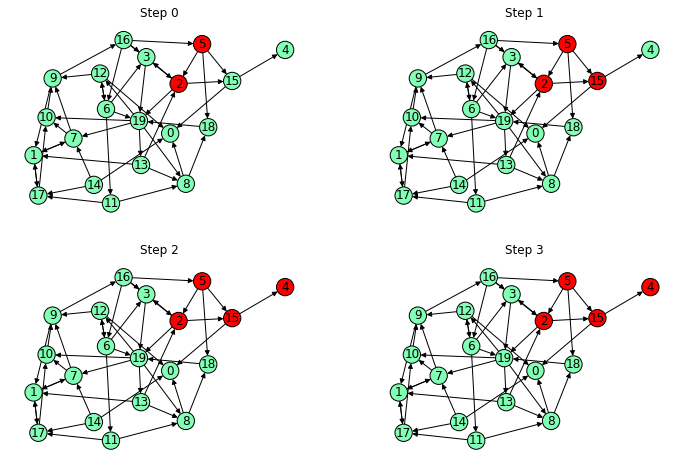

In [37]:
plt.figure(figsize=(6*2, 4*2))

for i, color in enumerate(sim):
    plt.subplot(2, 2, i+1)
    nx.draw(G, pos, with_labels=True, 
            node_color=color+1, 
            vmin=0, vmax=2, 
            cmap=plt.cm.rainbow,
            edgecolors='black')
    plt.title('Step {}'.format(i))
plt.show()

## Задание 8. Независимая каскадная модель (2 балла)

Следующий тип – независимая каскадная модель. Мы снова начинаем с начального набора активных узлов, и процесс разворачивается дискретными шагами в соответствии со следующим рандомизированным правилом. Когда узел $v$ впервые становится активным на шаге $t$, ему дается единственный шанс активировать каждого неактивного в данный момент соседа $w$; это удается с вероятностью $p_{v,w}$ — параметром системы — независимо от истории до сих пор. (Если $w$ имеет несколько вновь активированных соседей, их попытки следуют в произвольном порядке.) Если $v$ завершается успешно, то $w$ становится активным на шаге $t+1$; но независимо от того, удастся ли $v$, он не сможет предпринимать дальнейших попыток активировать $w$ на последующих шагах.

Напишите функцию `independent_cascade`, которая принимает граф, np.array active_nodes с нулями и единицами (если active_nodes[i] равно 1, то i-й узел активен), np.array с вероятностями распространения `prop_proba` для ребер, упорядоченных по `G.edges`. Функция распространяет влияние и останавливается, когда модель перестает изменяться. Функция возвращает np.array с активными узлами на каждом шаге. Первый шаг — начальная активация, последний и предпоследний шаги одинаковы (мы хотим, чтобы модель перестала меняться).

In [38]:
def independent_cascade(G, active_nodes, prop_proba):
    # YOUR CODE HERE
    
    for idx, edge in enumerate(G.edges):
        G[edge[0]][edge[1]]['prop'] = prop_proba[idx]
        G[edge[0]][edge[1]]['attempt'] = True
    
    result =[active_nodes]
    current_active_nodes = active_nodes.copy()
    
    while True:
        active_nodes = current_active_nodes.copy()
        for n in G.nodes:
            if current_active_nodes[n] == 1:
                for edge in G.edges(n):
                    if G[edge[0]][edge[1]]['attempt']:
                        G[edge[0]][edge[1]]['attempt'] = False
                        prop = G[edge[0]][edge[1]]['prop']
                        if np.random.rand() < prop:
                            current_active_nodes[edge[1]] = 1
        
        result.append(current_active_nodes.copy())
        
        if np.all(active_nodes == current_active_nodes):
            break
            
    return np.array(result)

In [39]:
np.random.seed(1)
active_nodes = np.zeros(20, 'int')
active_nodes[np.random.choice(np.arange(20), 2, False)] = 1
prop_proba = np.random.rand(len(G.edges))

sims = []
n_steps = []
for i in range(1000):
    sim = independent_cascade(G, active_nodes, prop_proba)
    sims.append(sim)
    n_steps.append(len(sim))
sigma = 1.9165
mean = 5.103
assert mean - 2*sigma < np.mean(n_steps) < mean + 2*sigma
sim = sims[n_steps.index(6)]
assert sim.shape == (6, 20)
assert np.all(sim[0] == active_nodes)
assert np.all(sim[-1] == sim[-2])
for i in range(1, 4):
    attempts = sim[i] - sim[i-1]
    new_active = sim[i+1] - sim[i]
    has_edge = False
    for j in np.argwhere(attempts == 1):
        for k in np.argwhere(new_active == 1):
            if G.has_edge(j[0], k[0]):
                has_edge = True
    assert has_edge

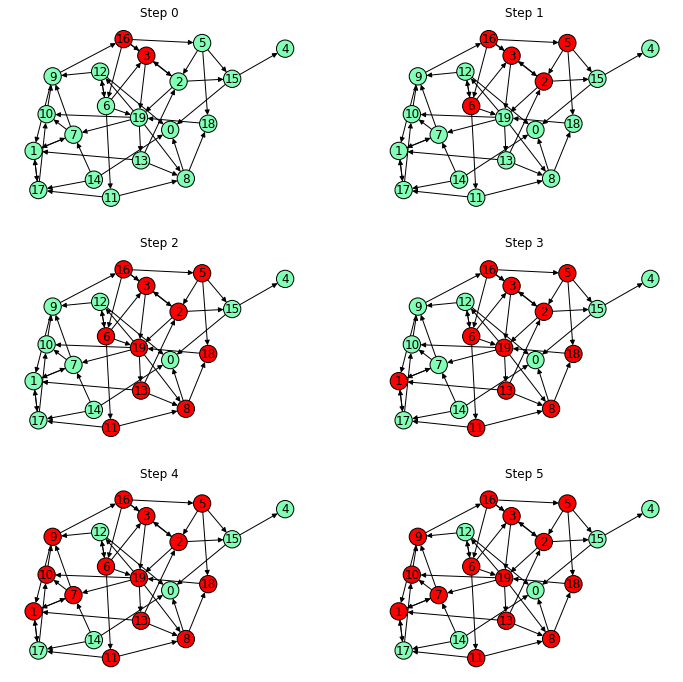

In [40]:
plt.figure(figsize=(6*2, 4*3))

for i, color in enumerate(sim):
    plt.subplot(3, 2, i+1)
    nx.draw(G, pos, with_labels=True, 
            node_color=color+1, 
            vmin=0, vmax=2, 
            cmap=plt.cm.rainbow,
            edgecolors='black')
    plt.title('Step {}'.format(i))
plt.show()

## Задание 9. Максимизация жадного влияния (2 балла)

Влияние — это ожидаемое количество активных узлов в конце процесса.

$$\sigma(A_0) = \mathbb E[|A_t|]$$

где $A_0$ — начальные активные узлы, а $A_t$ — активные узлы в конце. Линейная пороговая модель является детерминированной, и тогда $E[|A_t|] = |A_t|$.

Задача максимизации влияния заключается в том, чтобы для заданного числа начальных активных узлов $k$ найти набор узлов, дающий максимальное влияние. Это NP-сложная задача, но ее полезное свойство заключается в том, что ее можно решить за полиномиальное время с помощью жадной оптимизации с гарантированной производительностью чуть выше 63%. Доказательства [здесь](https://theoryofcomputing.org/articles/v011a004/v011a004.pdf). Алгоритм:

1. Пусть $A_0 = \emptyset$
2. Для каждого узла $i$ вычислить влияние $\sigma(A_0 \cup \{i\})$
3. Поместить узел с наибольшим влиянием в исходное активное множество $A_0 = A_0 \cup \{i\}$
4. Повторяйте 2-3, пока $|A_0| = k$

Write a function `greedy_influence_max` that takes a graph, `thresholds` of linear threshold model, number of active nodes `k` and calculates initial active nodes by greedy algorithm. The function returns a np.array with zeros and ones (if `active_nodes[i]` is 1 then the i-th node is active).

In [41]:
def greedy_influence_max(G, thresholds, k):
    # YOUR CODE HERE
    
    active_nodes = np.zeros(np.size(G.nodes))
    
    while np.sum(active_nodes) < k:
        best_node = -1
        best_score = 0
        for i in G.nodes():
            if not active_nodes[i]:
                curr_active_nodes = active_nodes.copy()
                curr_active_nodes[i] = 1
                sigma = np.sum(linear_threshold(G, curr_active_nodes, thresholds)[-1])
                if sigma > best_score:
                    best_score = sigma
                    best_node = i
        
        active_nodes[best_node] = 1
        
    return active_nodes

In [42]:
n = 100
G = nx.erdos_renyi_graph(n, 0.07, 0, True)

np.random.seed(0)
active_nodes = np.zeros(n, 'int')
active_nodes[np.random.choice(np.arange(n), 2, False)] = 1
thresholds = np.random.uniform(0.1, 0.8, n)

best_active = greedy_influence_max(G, thresholds, 2)
assert best_active.shape == (100,)
assert best_active.sum() == 2
sim = linear_threshold(G, best_active, thresholds)
assert sim[-1].sum() > 21 * 0.63

Здесь та же модель, что и в линейной пороговой задаче, но с лучшим начальным активным набором.

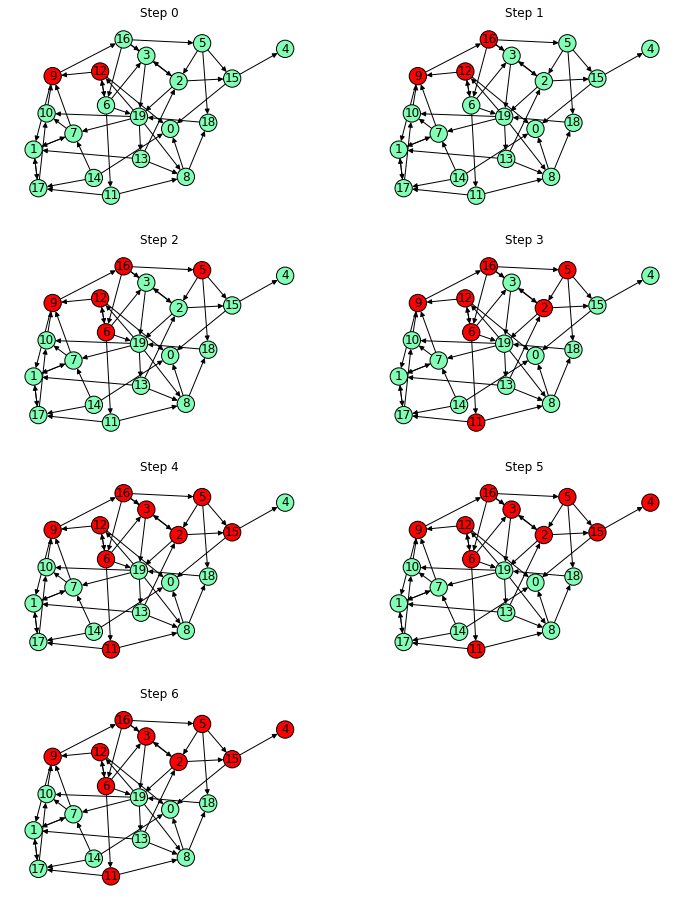

In [43]:
n = 20
G = nx.erdos_renyi_graph(n, 0.11, 0, True)

np.random.seed(5)
active_nodes = np.zeros(n, 'int')
active_nodes[np.random.choice(np.arange(n), 2, False)] = 1
thresholds = np.random.uniform(0.5, 1, n)

best_active = greedy_influence_max(G, thresholds, 2)
sim = linear_threshold(G, best_active, thresholds)

plt.figure(figsize=(6*2, 4*4))

for i, color in enumerate(sim):
    plt.subplot(4, 2, i+1)
    nx.draw(G, pos, with_labels=True, 
            node_color=color+1, 
            vmin=0, vmax=2, 
            cmap=plt.cm.rainbow,
            edgecolors='black')
    plt.title('Step {}'.format(i))
plt.show()